Primeiras linhas de X:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Distribuição das classes em y:
target
0    50
1    50
2    50
Name: count, dtype: int64
Formas dos conjuntos:
X_train: (105, 4)
X_test : (45, 4)
y_train: (105,)
y_test : (45,)
Modelo KNN treinado com sucesso!
Algumas previsões: [2 1 2 1 2 2 1 1 0 2]
Valores reais     : [2 1 2 1 2 2 1 1 0 2]
Acurácia do KNN: 0.9778

Relatório de Classificação (KNN):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



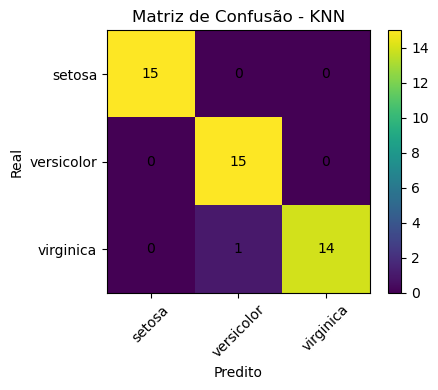

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Carrega o dataset Iris do scikit-learn
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print("Primeiras linhas de X:")
display(X.head())

print("\nDistribuição das classes em y:")
print(y.value_counts())

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Formas dos conjuntos:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

# Cria o modelo KNN (K = 5)
model = KNeighborsClassifier(n_neighbors=5)

# Treina o modelo
model.fit(X_train, y_train)

print("Modelo KNN treinado com sucesso!")

# Faz previsões
y_pred = model.predict(X_test)

print("Algumas previsões:", y_pred[:10])
print("Valores reais     :", y_test.values[:10])

# Avaliação
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {acc:.4f}\n")

print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest")
plt.title("Matriz de Confusão - KNN")
plt.colorbar()
tick_marks = range(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.ylabel("Real")
plt.xlabel("Predito")
plt.tight_layout()
plt.show()
